In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.38951189 0.19301823 0.40161108 ... 0.38055943 0.05614471 0.12844504]
 [0.60371086 0.29916212 0.62246359 ... 0.58983529 0.08701961 0.19907907]
 [0.52968924 0.26248154 0.54614268 ... 0.51751497 0.07635004 0.17466978]
 ...
 [0.86572603 0.42900079 0.89261759 ... 0.84582836 0.12478679 0.28548092]
 [0.4018797  0.19914696 0.41436306 ... 0.39264298 0.05792742 0.13252344]
 [0.19457596 0.09641992 0.20061996 ... 0.19010386 0.02804641 0.06416317]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.29331797  0.14860442  0.24938744 ...  0.49765261  0.19998346
   0.20327707]
 [ 0.64433437         nan  0.68459342 ...  0.63259301  0.06235068
   0.08846552]
 [ 0.64569325  0.31916821  0.42291161 ...  0.56617399  0.33167462
   0.26983177]
 ...
 [ 0.84945051  0.49256113  0.88180253 ...  0.97883583  0.14858532
   0.25558929]
 [ 0.40700623  0.32842751  0.33687005 ...  0.39934759 -0.06968641
   0.05310843]
 [ 0.20415712  0.09564206  0.26676542 ...  0.20125653  0.17470297
   0.10

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

LinAlgError: SVD did not converge

In [4]:
K = np.min([K, U.shape[1]])
print(K)

NameError: name 'U' is not defined

In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=0.079027
[IterativeSVD] Iter 2: observed MAE=0.075360
[IterativeSVD] Iter 3: observed MAE=0.068546
[IterativeSVD] Iter 4: observed MAE=0.057742
[IterativeSVD] Iter 5: observed MAE=0.052353
[IterativeSVD] Iter 6: observed MAE=0.052327
[IterativeSVD] Iter 7: observed MAE=0.052317
[IterativeSVD] Iter 8: observed MAE=0.052314
[IterativeSVD] Iter 9: observed MAE=0.052311
[IterativeSVD] Iter 10: observed MAE=0.052310
[IterativeSVD] Iter 11: observed MAE=0.052309
[IterativeSVD] Iter 12: observed MAE=0.052308
[IterativeSVD] Iter 13: observed MAE=0.052308
[IterativeSVD] Iter 14: observed MAE=0.052308
[IterativeSVD] Iter 15: observed MAE=0.052308
[IterativeSVD] Iter 16: observed MAE=0.052308
[IterativeSVD] Iter 17: observed MAE=0.052307
[-0.15122337 -0.29593546 -0.10730469 -0.00418468 -0.08004341 -0.33621212
  0.01476734  0.23721629  0.02673789 -0.18997129 -0.01306331  0.141159

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

NameError: name 'U' is not defined

check partial residual is good, seems fine

NameError: name 'L' is not defined

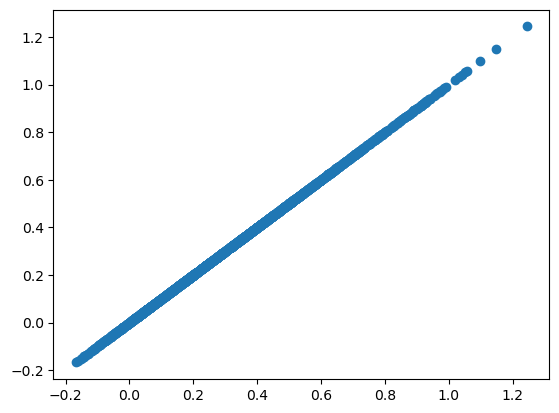

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[146.31297809, 146.31297809, 146.31297809, ..., 146.31297809,
        146.31297809, 146.31297809],
       [146.31297809, 146.31297809, 146.31297809, ..., 146.31297809,
        146.31297809, 146.31297809],
       [146.31297809, 146.31297809, 146.31297809, ..., 146.31297809,
        146.31297809, 146.31297809],
       ...,
       [146.31297809, 146.31297809, 146.31297809, ..., 146.31297809,
        146.31297809, 146.31297809],
       [146.31297809, 146.31297809, 146.31297809, ..., 146.31297809,
        146.31297809, 146.31297809],
       [146.31297809, 146.31297809, 146.31297809, ..., 146.31297809,
        146.31297809, 146.31297809]])

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.11849661, -0.23688747, -0.23080899, -0.13989622, -0.07392985,
        -0.09037608, -0.05840654, -0.05695232, -0.06153689, -0.02737663,
        -0.1859531 , -0.20613863, -0.00848687, -0.2224807 , -0.1796512 ,
        -0.13057583, -0.15637999, -0.20699619, -0.16023112, -0.24173239,
        -0.1316001 , -0.22351854, -0.03638187, -0.19068082, -0.00933013,
        -0.15562623, -0.14877151, -0.24076407, -0.00949388, -0.23520473,
        -0.15189993, -0.07240111, -0.2243118 , -0.01259923, -0.13550005,
        -0.14011974, -0.17019666, -0.23774079, -0.1912996 , -0.03182819]),
 array([0.0049312, 0.0049312, 0.0049312, 0.0049312, 0.0049312, 0.0049312,
        0.0049312, 0.0049312, 0.0049312, 0.0049312, 0.0049312, 0.0049312,
        0.0049312, 0.0049312, 0.0049312, 0.0049312, 0.0049312, 0.0049312,
        0.0049312, 0.0049312, 0.0049312, 0.0049312, 0.0049312, 0.0049312,
        0.0049312, 0.0049312, 0.0049312, 0.0049312, 0.0049312, 0.0049312,
        0.0049312, 0.0049312, 0.0049312, 0.0

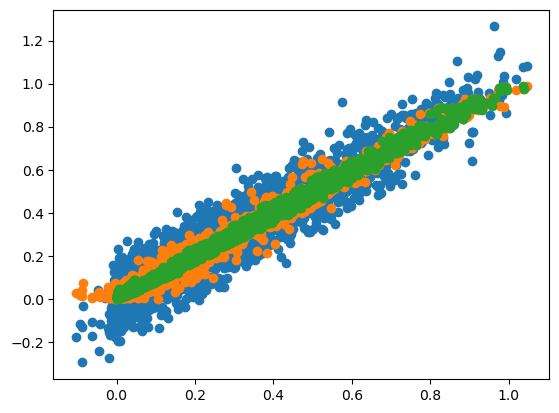

In [10]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


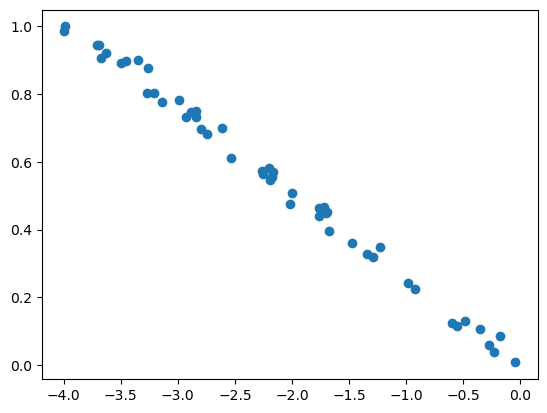

In [11]:
plt.scatter(mycebmf.L[:,0], u)

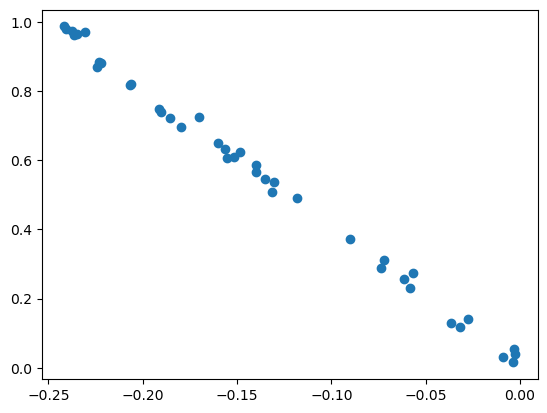

In [13]:
plt.scatter(mycebmf.F[:,0], v)

In [12]:
mycebmf.L[:,1]

array([-0.07326743, -0.21650588, -0.03583965, -0.0007133 , -0.02168345,
       -0.28912405,  0.00323422,  0.18679819,  0.0057307 , -0.12207616,
       -0.0026911 ,  0.0644133 , -0.00521392,  0.11703204, -0.00253226,
        0.01306695,  0.03191715, -0.04674698,  0.01354548, -0.02878402,
        0.13103586,  0.09423884, -0.02072376, -0.05922889,  0.19004132,
       -0.11083249, -0.00277327,  0.23596085, -0.26504243, -0.06660385,
        0.06984151, -0.00417312, -0.00925417, -0.09018307,  0.22086161,
        0.01885869,  0.28308178, -0.24359195, -0.0571348 ,  0.00974726,
        0.01547684, -0.00856645,  0.03937761, -0.09979347, -0.4468597 ,
       -0.00275432,  0.10931305,  0.00887424,  0.24773557,  0.08200946])

In [13]:
for i in range(40):
    mycebmf.iter()

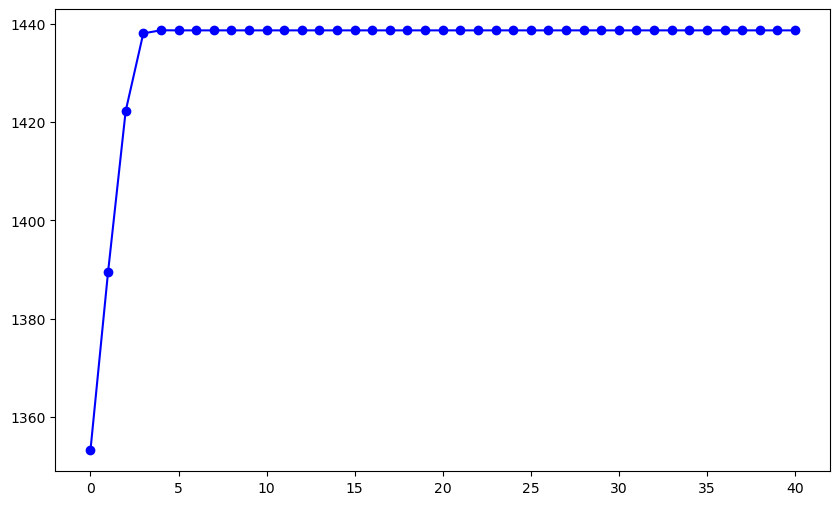

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

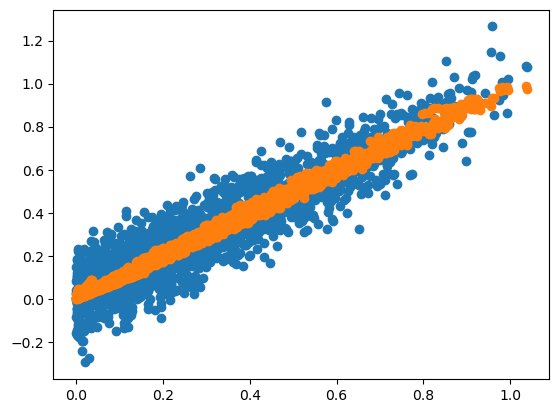

In [15]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)